<h1><p style="text-align: center;">Data Analysis with Python <br>Project - 1</p><h1> - Traffic Police Stops <br><img src="https://thumbs.dreamstime.com/z/traffic-police-officer-uk-vector-illustration-traffic-police-officer-uk-187594525.jpg" class="img-fluid" alt="CLRSWY" width="200" height="100"> 

In this chapter, we will use a **second dataset** to explore the impact of **weather conditions** on police behavior during traffic stops. We will practice **merging** and **reshaping** datasets, assessing whether a data source is trustworthy, working with **categorical** data, and other advanced skills.

## Plotting the temperature

In this exercise, we'll examine the ``temperature`` columns from the ``weather`` dataset to assess whether the data seems trustworthy. First we'll print the summary statistics, and then you'll visualize the data using a **box plot**.

In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
pol = pd.read_csv('police.csv.zip').sample(50000, random_state=101)
pol.shape

pol.drop(['state', 'county_name'], axis=1, inplace=True)

pol.dropna(subset=['driver_gender'], inplace=True)

pol['is_arrested']=pol['is_arrested'].astype({'is_arrested':'bool'})

pol['stop_datetime'] = pol['stop_date'] + ' ' + pol['stop_time']

pol['stop_datetime'] = pd.to_datetime(pol['stop_datetime'])

pol.set_index('stop_datetime', inplace=True)

/Users/ozkanyildirim/opt/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3063: DtypeWarning: Columns (8,16) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [2]:
weather = pd.read_csv('weather.csv')
weather.head()

,STATION,DATE,AWND,TAVG,TMAX,TMIN,WT01,WT02,WT03,WT04,...,WT11,WT13,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22
0,USC00379423,2005-01-01,NaN,NaN,47.0,28.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,USC00379423,2005-01-02,NaN,NaN,52.0,24.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,USC00379423,2005-01-03,NaN,NaN,48.0,27.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,USC00379423,2005-01-04,NaN,NaN,54.0,40.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,USC00379423,2005-01-05,NaN,NaN,44.0,31.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8022 entries, 0 to 8021
Data columns (total 26 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   STATION  8022 non-null   object 
 1   DATE     8022 non-null   object 
 2   AWND     4017 non-null   float64
 3   TAVG     1217 non-null   float64
 4   TMAX     8005 non-null   float64
 5   TMIN     7996 non-null   float64
 6   WT01     1777 non-null   float64
 7   WT02     221 non-null    float64
 8   WT03     227 non-null    float64
 9   WT04     119 non-null    float64
 10  WT05     360 non-null    float64
 11  WT06     25 non-null     float64
 12  WT07     79 non-null     float64
 13  WT08     404 non-null    float64
 14  WT09     69 non-null     float64
 15  WT10     2 non-null      float64
 16  WT11     3 non-null      float64
 17  WT13     1175 non-null   float64
 18  WT14     575 non-null    float64
 19  WT15     6 non-null      float64
 20  WT16     1326 non-null   float64
 21  WT17     12 no

In [4]:
temperature = weather[['TMIN', 'TAVG', 'TMAX']]
temperature.describe()

,TMIN,TAVG,TMAX
count,7996.000000,1217.000000,8005.000000
mean,42.099425,52.493016,61.247096
std,17.386667,17.829792,18.495043
min,-10.000000,6.000000,13.000000
25%,29.000000,39.000000,46.000000
50%,42.000000,54.000000,62.000000
75%,57.000000,68.000000,77.000000
max,77.000000,86.000000,102.000000


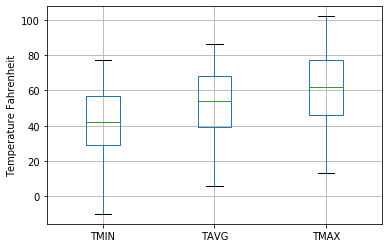

In [5]:
fig_temp = temperature.boxplot()
fig_temp.set_ylabel('Temperature Fahrenheit')
plt.show()

***

## Plotting the temperature difference

In this exercise, we'll continue to assess ``whether`` the dataset seems trustworthy by plotting the difference between the maximum and minimum temperatures.

In [6]:
weather['TDIFF'] = weather['TMAX'] - weather['TMIN']

In [7]:
weather['TDIFF'].describe()

count    7994.000000
mean       19.149237
std         7.009716
min       -25.000000
25%        14.000000
50%        19.000000
75%        24.000000
max        48.000000
Name: TDIFF, dtype: float64

In [8]:
weather['TDIFF'].argmin()

1201

In [9]:
weather.iloc[1201]

STATION    USC00379423
DATE        2008-04-26
AWND               NaN
TAVG               NaN
TMAX                51
TMIN                76
WT01               NaN
WT02               NaN
WT03               NaN
WT04               NaN
WT05               NaN
WT06               NaN
WT07               NaN
WT08               NaN
WT09               NaN
WT10               NaN
WT11               NaN
WT13               NaN
WT14               NaN
WT15               NaN
WT16               NaN
WT17               NaN
WT18               NaN
WT19               NaN
WT21               NaN
WT22               NaN
TDIFF              -25
Name: 1201, dtype: object

In [10]:
weather['TDIFF'][weather['TDIFF'] < 0]

1201   -25.0
Name: TDIFF, dtype: float64

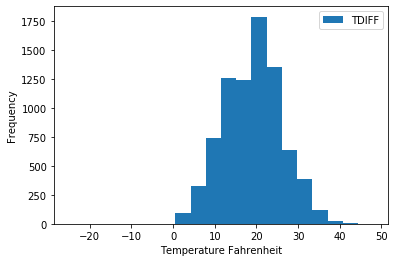

In [11]:
fig_diff = weather[['TDIFF']].plot.hist(bins=20)
fig_diff.set_xlabel('Temperature Fahrenheit')
plt.show()

In [12]:
weather[['TDIFF','TMIN','TMAX']]

,TDIFF,TMIN,TMAX
0,19.0,28.0,47.0
1,28.0,24.0,52.0
2,21.0,27.0,48.0
3,14.0,40.0,54.0
4,13.0,31.0,44.0
...,...,...,...
8017,17.0,44.0,61.0
8018,14.0,30.0,44.0
8019,12.0,28.0,40.0
8020,8.0,27.0,35.0


In [41]:
1 - np.nan

nan

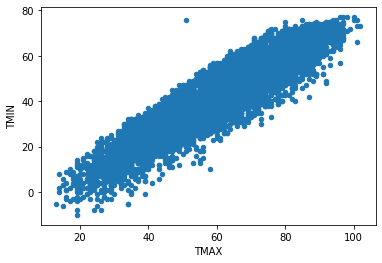

In [13]:
fig_diff_sc = weather[['TDIFF','TMIN','TMAX']].plot.scatter(x='TMAX',y='TMIN')
plt.show()

***

## Counting bad weather conditions

The ``weather`` ``DataFrame`` contains ``20`` columns that start with ``'WT'``, each of which represents a bad weather condition. For example:

*   ``WT05`` indicates ``"Hail"``
*   ``WT11`` indicates ``"High or damaging winds"``
*   ``WT17`` indicates ``"Freezing rain"``

For every row in the dataset, each ``WT`` column contains either a ``1`` (meaning the condition was present that day) or ``NaN`` (meaning the condition was not present).

In this exercise, we'll quantify ``"how bad"`` the weather was each day by counting the number of ``1`` values in each row.

In [42]:
wt = weather.loc[:, 'WT01':'WT22']
wt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8022 entries, 4016 to 8021
Data columns (total 20 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   WT01    1777 non-null   float64
 1   WT02    221 non-null    float64
 2   WT03    227 non-null    float64
 3   WT04    119 non-null    float64
 4   WT05    360 non-null    float64
 5   WT06    25 non-null     float64
 6   WT07    79 non-null     float64
 7   WT08    404 non-null    float64
 8   WT09    69 non-null     float64
 9   WT10    2 non-null      float64
 10  WT11    3 non-null      float64
 11  WT13    1175 non-null   float64
 12  WT14    575 non-null    float64
 13  WT15    6 non-null      float64
 14  WT16    1326 non-null   float64
 15  WT17    12 non-null     float64
 16  WT18    345 non-null    float64
 17  WT19    4 non-null      float64
 18  WT21    18 non-null     float64
 19  WT22    32 non-null     float64
dtypes: float64(20)
memory usage: 1.3 MB


In [43]:
wt = wt.fillna(0)
wt

,WT01,WT02,WT03,WT04,WT05,WT06,WT07,WT08,WT09,WT10,WT11,WT13,WT14,WT15,WT16,WT17,WT18,WT19,WT21,WT22
4016,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
4010,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0
4342,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0
4354,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0
6233,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2665,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2664,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2663,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2662,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [44]:
weather['bad_conditions'] = [sum(wt.loc[i]) for i in range(len(wt))]
 
weather[['bad_conditions']].describe()

,bad_conditions
count,8022.000000
mean,0.845051
std,1.605781
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,9.000000


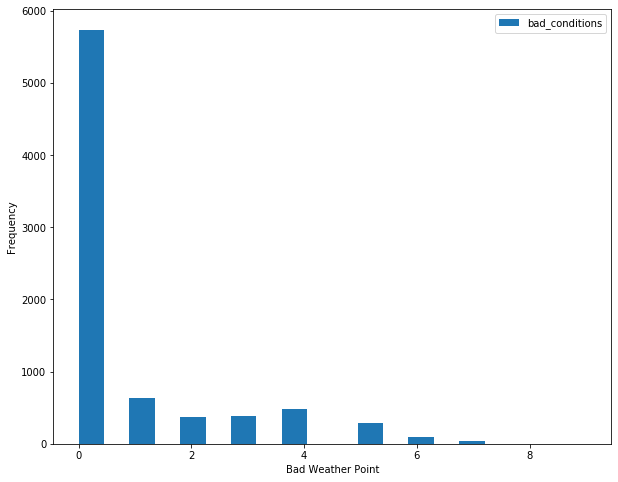

In [45]:
fig_bad = weather[['bad_conditions']].plot.hist(bins=20, figsize=(10,8))
fig_bad.set_xlabel('Bad Weather Point')
plt.show()

***

## Rating the weather conditions

In the previous exercise, we counted the number of bad weather conditions each day. In this exercise, we'll use the counts to create a *rating system** for the weather.

The counts range from ``0`` to ``9``, and should be converted to ratings as follows:

*   Convert ``0`` to ``'good'``
*   Convert ``1`` through ``4`` to ``'bad'``
*   Convert ``5`` through ``9`` to ``'worse'``

In [46]:
bad_cond_sorted = weather['bad_conditions'].value_counts().sort_index()
bad_cond_sorted

0.0    5738
1.0     628
2.0     368
3.0     380
4.0     476
5.0     282
6.0     101
7.0      41
8.0       4
9.0       4
Name: bad_conditions, dtype: int64

In [47]:
weather = weather.sort_values(by='bad_conditions', ascending = False)

In [48]:
def rater(x):
    if x == 0.0:
        x = 'good'
    elif x >= 1.0 and x <= 4.0:
        x = 'bad'
    elif x >= 5.0 and x <= 9.0:
        x = 'worse'
    return x

mapping_check = list(zip(list(map(rater,bad_cond_sorted.index)), bad_cond_sorted))
mapping_check

[('good', 5738),
 ('bad', 628),
 ('bad', 368),
 ('bad', 380),
 ('bad', 476),
 ('worse', 282),
 ('worse', 101),
 ('worse', 41),
 ('worse', 4),
 ('worse', 4)]

In [49]:
weather['rating'] = list(map(rater,weather['bad_conditions']))
weather['rating'].value_counts()

good     5738
bad      1852
worse     432
Name: rating, dtype: int64

***

## Changing the data type to category

Since the ``rating`` column only has a few possible values, we'll change its data type to ``category`` in order to store the data more efficiently. We'll also specify a logical order for the categories, which will be useful for future needs.

In [50]:
cats = ['good', 'bad', 'worse']

In [51]:
cat_dtype = pd.api.types.CategoricalDtype(categories=cats, ordered=True)
weather['rating'] = weather['rating'].astype(cat_dtype)

In [53]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8022 entries, 7139 to 4016
Data columns (total 29 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   STATION         8022 non-null   object  
 1   DATE            8022 non-null   object  
 2   AWND            4017 non-null   float64 
 3   TAVG            1217 non-null   float64 
 4   TMAX            8005 non-null   float64 
 5   TMIN            7996 non-null   float64 
 6   WT01            1777 non-null   float64 
 7   WT02            221 non-null    float64 
 8   WT03            227 non-null    float64 
 9   WT04            119 non-null    float64 
 10  WT05            360 non-null    float64 
 11  WT06            25 non-null     float64 
 12  WT07            79 non-null     float64 
 13  WT08            404 non-null    float64 
 14  WT09            69 non-null     float64 
 15  WT10            2 non-null      float64 
 16  WT11            3 non-null      float64 
 17  WT13       

In [54]:
weather['rating'].head()

7139    worse
222     worse
840     worse
1010    worse
1356    worse
Name: rating, dtype: category
Categories (3, object): [good < bad < worse]

***

## Preparing the DataFrames

In this step, we'll prepare the **traffic stop** and **weather rating** ``DataFrames`` so that they're ready to be merged:

With the ``ri`` ``DataFrame``, we'll move the ``stop_datetime`` index to a ``column`` since the index will be lost during the merge.

With the ``weather`` ``DataFrame``, we'll select the ``DATE`` and ``rating`` columns and put them in a new ``DataFrame``.

In [55]:
pol.reset_index(inplace=True)

In [56]:
pol.head()

,index,stop_datetime,id,stop_date,stop_time,location_raw,county_fips,fine_grained_location,police_department,driver_gender,...,search_conducted,search_type_raw,search_type,contraband_found,stop_outcome,is_arrested,stop_duration,out_of_state,drugs_related_stop,district
0,0,2009-02-28 11:02:00,RI-2009-08019,2009-02-28,11:02,Zone K2,NaN,NaN,900,M,...,False,NaN,NaN,False,Citation,False,0-15 Min,True,False,Zone K2
1,1,2012-05-17 13:45:00,RI-2012-27184,2012-05-17,13:45,Zone K2,NaN,NaN,900,F,...,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone K2
2,2,2008-08-30 18:09:00,RI-2008-32661,2008-08-30,18:09,Zone K3,NaN,NaN,300,M,...,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone K3
3,3,2009-04-13 22:36:00,RI-2009-14329,2009-04-13,22:36,Zone K1,NaN,NaN,600,M,...,False,NaN,NaN,False,Citation,False,16-30 Min,True,False,Zone K1
4,4,2012-08-24 22:19:00,RI-2012-44496,2012-08-24,22:19,Zone X4,NaN,NaN,500,F,...,False,NaN,NaN,False,Citation,False,0-15 Min,False,False,Zone X4


In [57]:
weather_rating = weather[['DATE','rating']]
weather_rating.head()

,DATE,rating
7139,2013-08-01,worse
222,2005-08-13,worse
840,2007-04-28,worse
1010,2007-10-17,worse
1356,2008-09-30,worse


## Merging the DataFrames

Merging the DataFrames
In this exercise, we'll ``merge`` the ``ri`` and ``weather_rating`` ``DataFrames`` into a new ``DataFrame``, ``ri_weather``.

The ``DataFrames`` will be joined using the ``stop_date`` column from ``ri`` and the ``DATE`` column from ``weather_rating``. Thankfully the date formatting matches exactly, which is not always the case!

Once the merge is complete, we'll set ``stop_datetime`` as the index, which is the column we saved in the previous exercise.

In [58]:
pol_weather = pol.merge(weather_rating, how='left', left_on='stop_date', right_on='DATE')

In [59]:
pol_weather

,index,stop_datetime,id,stop_date,stop_time,location_raw,county_fips,fine_grained_location,police_department,driver_gender,...,search_type,contraband_found,stop_outcome,is_arrested,stop_duration,out_of_state,drugs_related_stop,district,DATE,rating
0,0,2009-02-28 11:02:00,RI-2009-08019,2009-02-28,11:02,Zone K2,NaN,NaN,900,M,...,NaN,False,Citation,False,0-15 Min,True,False,Zone K2,2009-02-28,bad
1,0,2009-02-28 11:02:00,RI-2009-08019,2009-02-28,11:02,Zone K2,NaN,NaN,900,M,...,NaN,False,Citation,False,0-15 Min,True,False,Zone K2,2009-02-28,good
2,1,2012-05-17 13:45:00,RI-2012-27184,2012-05-17,13:45,Zone K2,NaN,NaN,900,F,...,NaN,False,Citation,False,0-15 Min,False,False,Zone K2,2012-05-17,bad
3,1,2012-05-17 13:45:00,RI-2012-27184,2012-05-17,13:45,Zone K2,NaN,NaN,900,F,...,NaN,False,Citation,False,0-15 Min,False,False,Zone K2,2012-05-17,good
4,2,2008-08-30 18:09:00,RI-2008-32661,2008-08-30,18:09,Zone K3,NaN,NaN,300,M,...,NaN,False,Citation,False,0-15 Min,False,False,Zone K3,2008-08-30,worse
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
94219,47177,2012-12-22 01:26:00,RI-2012-59994,2012-12-22,01:26,Zone X4,NaN,NaN,500,M,...,NaN,False,Citation,False,0-15 Min,False,False,Zone X4,2012-12-22,good
94220,47178,2012-10-25 15:19:00,RI-2012-52989,2012-10-25,15:19,Zone K3,NaN,NaN,300,M,...,NaN,False,Citation,False,0-15 Min,True,False,Zone K3,2012-10-25,bad
94221,47178,2012-10-25 15:19:00,RI-2012-52989,2012-10-25,15:19,Zone K3,NaN,NaN,300,M,...,NaN,False,Citation,False,0-15 Min,True,False,Zone K3,2012-10-25,good
94222,47179,2013-03-21 11:54:00,RI-2013-09739,2013-03-21,11:54,Zone K3,NaN,NaN,300,F,...,NaN,False,Warning,False,0-15 Min,False,False,Zone K3,2013-03-21,good


In [31]:
pol_weather.set_index('stop_datetime', inplace=True)

In [32]:
pol_weather.head()

,id,stop_date,stop_time,location_raw,county_fips,fine_grained_location,police_department,driver_gender,driver_age_raw,driver_age,...,search_type,contraband_found,stop_outcome,is_arrested,stop_duration,out_of_state,drugs_related_stop,district,DATE,rating
stop_datetime,,,,,,,,,,,,,,,,,,,,,
2009-02-28 11:02:00,RI-2009-08019,2009-02-28,11:02,Zone K2,NaN,NaN,900,M,1952.0,57.0,...,NaN,False,Citation,False,0-15 Min,True,False,Zone K2,2009-02-28,bad
2009-02-28 11:02:00,RI-2009-08019,2009-02-28,11:02,Zone K2,NaN,NaN,900,M,1952.0,57.0,...,NaN,False,Citation,False,0-15 Min,True,False,Zone K2,2009-02-28,good
2012-05-17 13:45:00,RI-2012-27184,2012-05-17,13:45,Zone K2,NaN,NaN,900,F,1991.0,21.0,...,NaN,False,Citation,False,0-15 Min,False,False,Zone K2,2012-05-17,bad
2012-05-17 13:45:00,RI-2012-27184,2012-05-17,13:45,Zone K2,NaN,NaN,900,F,1991.0,21.0,...,NaN,False,Citation,False,0-15 Min,False,False,Zone K2,2012-05-17,good
2008-08-30 18:09:00,RI-2008-32661,2008-08-30,18:09,Zone K3,NaN,NaN,300,M,1967.0,41.0,...,NaN,False,Citation,False,0-15 Min,False,False,Zone K3,2008-08-30,bad


***

## Comparing arrest rates by weather rating

Do police officers arrest drivers more often when the weather is bad? Let's find out below!

- **First**, we'll calculate the **overall arrest rate**.

- **Then**, we'll calculate the **arrest rate** for each of the **weather ratings** we previously assigned.

- **Finally**, we'll add **violation type** as a second factor in the analysis, to see if that accounts for any differences in the arrest rate.

Since we previously defined a logical order for the weather categories, ``good < bad < worse``, they will be sorted that way in the results.

In [33]:
pol_weather['is_arrested'].value_counts(normalize=True)

False    0.965168
True     0.034832
Name: is_arrested, dtype: float64

In [34]:
pol_weather.groupby('rating')['is_arrested'].value_counts(normalize=True)

rating  is_arrested
worse   False          0.800000
        True           0.200000
bad     False          0.963332
        True           0.036668
good    False          0.965691
        True           0.034309
Name: is_arrested, dtype: float64

In [35]:
pol_weather.groupby(['rating', 'violation'])['is_arrested'].value_counts(normalize=True)

rating  violation            is_arrested
worse   Equipment            False          0.666667
                             True           0.333333
        Moving violation     False          0.714286
                             True           0.285714
        Other                False          1.000000
        Speeding             False          1.000000
bad     Equipment            False          0.936161
                             True           0.063839
        Moving violation     False          0.940193
                             True           0.059807
        Other                False          0.923793
                             True           0.076207
        Registration/plates  False          0.889333
                             True           0.110667
        Seat belt            False          1.000000
        Speeding             False          0.985216
                             True           0.014784
good    Equipment            False          0.944200
     

***

## Selecting From a mult-indexed Series

The output of a single ``.groupby()`` operation on multiple columns is a ``Series`` with a ``MultiIndex``. Working with this type of object is similar to working with a ``DataFrame``:

The ``outer`` index level is like the ``DataFrame`` rows.
The ``inner`` index level is like the ``DataFrame`` columns.
In this part, we'll practice accessing data from a multi-indexed ``Series`` using the ``.loc[]`` accessor.

In [36]:
arrest_rate = pol_weather.groupby(['rating', 'violation'])['is_arrested'].value_counts(normalize=True)
arrest_rate

rating  violation            is_arrested
worse   Equipment            False          0.666667
                             True           0.333333
        Moving violation     False          0.714286
                             True           0.285714
        Other                False          1.000000
        Speeding             False          1.000000
bad     Equipment            False          0.936161
                             True           0.063839
        Moving violation     False          0.940193
                             True           0.059807
        Other                False          0.923793
                             True           0.076207
        Registration/plates  False          0.889333
                             True           0.110667
        Seat belt            False          1.000000
        Speeding             False          0.985216
                             True           0.014784
good    Equipment            False          0.944200
     

In [37]:
arrest_rate.loc['bad','Moving violation',True]

0.05980673805171063

In [38]:
arrest_rate.loc[['good','bad','worse'],'Speeding', True]

rating  violation  is_arrested
bad     Speeding   True           0.014784
good    Speeding   True           0.014599
Name: is_arrested, dtype: float64

***

## Reshaping the arrest rate data

In this step, we'll start by **reshaping** the ``arrest_rate`` ``Series`` into a ``DataFrame``. This is a useful step when working with any multi-indexed ``Series``, since it enables us to access the full range of ``DataFrame`` methods.

Then, we'll create the exact same ``DataFrame`` using a ``pivot table``. This is a great example of how pandas often gives us more than one way to reach the same result!

In [39]:
arrest_df = pd.DataFrame(arrest_rate)
arrest_df

is_arrested
rating violation           is_arrested             
worse  Equipment           False           0.666667
                           True            0.333333
       Moving violation    False           0.714286
                           True            0.285714
       Other               False           1.000000
       Speeding            False           1.000000
bad    Equipment           False           0.936161
                           True            0.063839
       Moving violation    False           0.940193
                           True            0.059807
       Other               False           0.923793
                           True            0.076207
       Registration/plates False           0.889333
                           True            0.110667
       Seat belt           False           1.000000
       Speeding            False           0.985216
                           True            0.014784
good   Equipment           False           0.944200
                           True            0.055800
       Moving violation    False           0.944210
                           True            0.055790
       Other               False           0.916043
                           True            0.083957
       Registration/plates False           0.920385
                           True            0.079615
       Seat belt           False           0.975148
                           True            0.024852
       Speeding            False           0.985401
                           True            0.014599

In [40]:
pd.pivot_table(pol_weather, values='is_arrested', index =  ['rating','violation'])
                                                                                        

is_arrested
rating violation                       
worse  Equipment               0.333333
       Moving violation        0.285714
       Other                   0.000000
       Speeding                0.000000
bad    Equipment               0.063839
       Moving violation        0.059807
       Other                   0.076207
       Registration/plates     0.110667
       Seat belt               0.000000
       Speeding                0.014784
good   Equipment               0.055800
       Moving violation        0.055790
       Other                   0.083957
       Registration/plates     0.079615
       Seat belt               0.024852
       Speeding                0.014599